In [374]:
import random
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import copy
import math

def graphBoxplot(data,tests, title, xlabel, ylabel):
    fig = plt.figure()
    ax = fig.add_axes([0, 0, 1, 1])
    bp = ax.boxplot(data, positions = tests, showmeans= True)
    ax.set_title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.show()
    
def exercise1(alphas):
    #1.1 ---> [OR]
    combinations_2bits = [[-1,-1],[-1,1],[1,-1],[1,1]]
    d_or =  [-1, 1, 1,1]
    d_and = [-1,-1,-1,1]
    
    for alpha in alphas:
        
        iterations = []
        
        for l in range(30):
            
            erro_sum = -1
            i=0

            #1.2
            w0 = random.randint(1,9)/10
            w1 = random.randint(1,9)/10
            w2 = random.randint(1,9)/10

            vw0 = 0
            vw1 = 0
            vw2 = 0

            while erro_sum != 0:
                i+=1
                errors = []

                for comb,desired_output in  zip(combinations_2bits,d_or):
                    x = w0*1 + w1*comb[0] + w2*comb[1]
                    if x > 0:
                        output = 1
                    else:
                        output = -1

                    #1.3
                    error = abs(output - desired_output) 
                    errors.append(error)

                    #1.4
                    vw0 = vw0 + alpha*(desired_output-output)*1
                    vw1 = vw1 + alpha*(desired_output-output)*comb[0]
                    vw2 = vw2 + alpha*(desired_output-output)*comb[1]

                #1.5
                w0 = w0 + vw0
                w1 = w1 + vw1
                w2 = w2 + vw2

                erro_sum = sum(errors)
            
            iterations.append(i)
        
        
        title = "Alpha =" + str(alpha)
        graphBoxplot(iterations,[30],title, "Number of tests","Iterations  through the set per test")
        print("\nIterations: ",iterations,"\nAverage iterations :",np.average(iterations),"\nStandard deviation :", np.std(iterations),"\n\n_______________________________\n\n")
        
def load_file(file_name):
    data =  pd.read_csv(file_name, sep=",", header=None)
    return data

def distance(r1 , r2):
    distance = 0
    for i in range(len(r1)-1):
        distance += (r1[i]-r2[i])**2
    return math.sqrt(distance)

def get_neighbors(training_set, test_row, k_neighbors):
    distances = []
    
    for train_row in training_set:
        d = distance(train_row,test_row)
        distances.append((train_row,d))
     
    distances.sort(key= lambda tup: tup[1])
    neighbors = distances[:k_neighbors]
    return neighbors

def predict_specie(training_set, test_row, k_neighbors):
    neighbors = get_neighbors(training_set, test_row, k_neighbors)
    neighbors_species = [row[0][-1] for row in neighbors]
    prediction = max(set(neighbors_species), key=neighbors_species.count)
    return prediction

def exercise2(data,k_neighbors):
    dataset = data.values
    scores = np.zeros((3,10))


    shufle_dataset = copy.deepcopy(dataset)
    intersection_point = int(0.7*150) # ponto de interceção entre os 70% e 30% do dataset

    for i in range(10):
        np.random.shuffle(shufle_dataset)

        training_set = shufle_dataset[:intersection_point] 
        test_set = shufle_dataset[intersection_point:]
        test_set_verify = copy.deepcopy(test_set)
        
        for k in k_neighbors:
            index = k_neighbors.index(k)
            for row in test_set:
                row[-1] = predict_specie(training_set,row,k)

            count = 0
            for predicted_row,verified_row in zip(test_set,test_set_verify):
                if predicted_row[-1] == verified_row[-1]:
                    count +=1

            score = count/len(test_set)*100
            scores[index][i] = score

    print("Average accuracy for k = 3 :",np.mean(scores[0]),"%")
    print("Average accuracy for k = 7 :",np.mean(scores[1]),"%")
    print("Average accuracy for k = 11 :",np.mean(scores[2]),"%")


    graphBoxplot([scores[0],scores[1],scores[2]],k_neighbors,"Accuracy for 10 experiments per k neighbors", "k neighbors" , "Accuracy per experiment (%)")
    
    fig, ax = plt.subplots(1,1,figsize =(10, 5))
    ax.plot(k_neighbors, [np.mean(scores[0]),np.mean(scores[1]),np.mean(scores[2])], color='maroon', linestyle='dashed', linewidth = 3, marker='o', markerfacecolor='blue', markersize=12)
    ax.set_xlabel('Number of Neighbors')
    ax.set_ylabel('Accuracy %')
    ax.set_title('Accuracy')
    plt.show()
    
def calculate_average_column(feature, data):
    average = data[feature].mean()
    return average

def split_dataset(feature,average,data):
    s1,s2 = data[data[feature] >= average],data[data[feature] < average]
    return s1,s2

def calculate_pplus(feature,data,target_value):
    try:
        pplus = data['class'].value_counts()[target_value]/len(data)
    except:
        pplus= 0
    return pplus
    
def calculate_pminus(pplus):
    pminus= 1 - pplus
    return pminus

def calculate_entropy(pplus,pminus):
    if pplus > 0:
        entropy = -pplus * math.log2(pplus) - pminus * math.log2(pminus)
    else:
        entropy = 0
    return entropy

def calculate_gain(entropy_s,entropy_s1,entropy_s2,s,s1,s2):
    gain = entropy_s -(s1*entropy_s1 + s2*entropy_s2)/s
    return gain

def exercise3(data,target_value):
    for feature in range(4):
        average = calculate_average_column(data.columns[feature],data)
        s1,s2 = split_dataset(data.columns[feature],average,data)
        pplus_s = calculate_pplus(feature,data,target_value)
        pminus_s = calculate_pminus(pplus_s)

        entropy_s = calculate_entropy(pplus_s,pminus_s)


        pplus_s1   = calculate_pplus(feature,s1,target_value)
        pminus_s1  = calculate_pminus(pplus_s1)
        entropy_s1 = calculate_entropy(pplus_s1,pminus_s1)


        pplus_s2   = calculate_pplus(feature,s2,target_value)
        pminus_s2  = calculate_pminus(pplus_s2)
        entropy_s2 = calculate_entropy(pplus_s2,pminus_s2)

        gain = calculate_gain(entropy_s,entropy_s1,entropy_s2,len(data),len(s1),len(s2))

        print("Gain of the split of S by  \'", data.columns[feature],"\' :",gain)
        
def get_probability(column,gaussian_distribution, value):
    for p in gaussian_distribution[column]:
        if p[0] == value:
            return p[1]

def get_values():
    x_values = []
    
    max_value = 8
    min_value = 0
    
    aux_min = int(min_value*10)
    aux_max = int((max_value+ 0.1)*10)
    
    for x in range(aux_min , aux_max):
        x_values.append(x/10)
    
    x_values = pd.DataFrame(x_values)  
    return x_values

def calculate__probabilities():
    p_setosa_test     = (p_setosa)    * (get_probability(0,gaussians_setosa,r[0])) * (get_probability(1,gaussians_setosa,r[1]))* (get_probability(2,gaussians_setosa,r[2])) * (get_probability(3,gaussians_setosa,r[3]))
    p_versicolor_test = (p_versicolor) * (get_probability(0,gaussians_versicolor,r[0]))* (get_probability(1,gaussians_versicolor,r[1]))* (get_probability(2,gaussians_versicolor,r[2])) * (get_probability(3,gaussians_versicolor,r[3]))
    p_virginica_test  = (p_virginica) * (get_probability(0,gaussians_virginica,r[0]))* (get_probability(1,gaussians_virginica,r[1]))* (get_probability(2,gaussians_virginica,r[2])) * (get_probability(3,gaussians_virginica,r[3]))
    
    return p_setosa_test,p_versicolor_test,p_virginica_test
        
def calculate_mean_std(data,column,specie):
    aux = []
    
    for i in data:
        if i[-1] == specie:
            aux.append(i[column])
    
    mean = np.mean(aux)
    std = np.std(aux)
    
    return mean,std
    
data = load_file('iris.data')
data.columns=['sepal length', 'sepal width', 'petal length', 'petal width', 'class']


# Ex 1


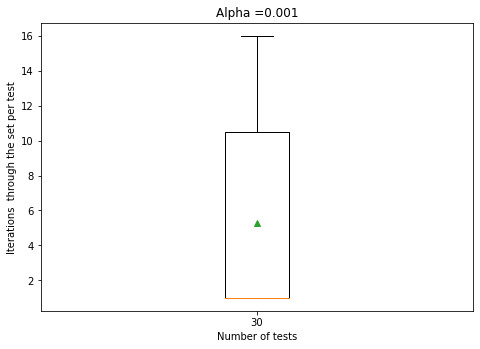


Iterations:  [2, 1, 1, 14, 1, 1, 11, 16, 9, 7, 1, 1, 2, 7, 13, 1, 1, 1, 1, 11, 1, 1, 1, 13, 1, 15, 1, 9, 13, 1] 
Average iterations : 5.266666666666667 
Standard deviation : 5.4094567400268785 

_______________________________




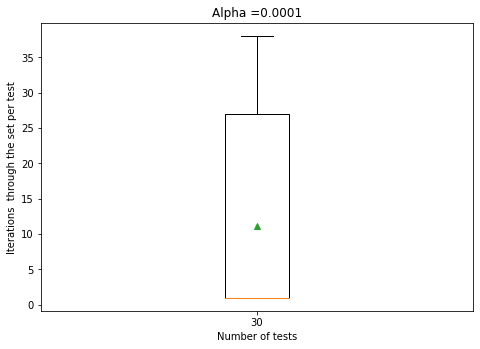


Iterations:  [1, 1, 19, 1, 27, 1, 1, 1, 27, 1, 2, 38, 33, 1, 27, 1, 1, 1, 19, 1, 1, 27, 1, 1, 2, 27, 33, 38, 1, 1] 
Average iterations : 11.2 
Standard deviation : 13.777759856619168 

_______________________________




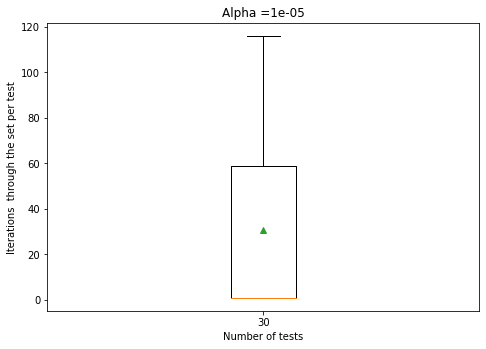


Iterations:  [116, 1, 59, 2, 59, 1, 59, 116, 1, 83, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 101, 1, 101, 1, 1, 1, 1, 116, 2, 83] 
Average iterations : 30.566666666666666 
Standard deviation : 43.58645304322077 

_______________________________




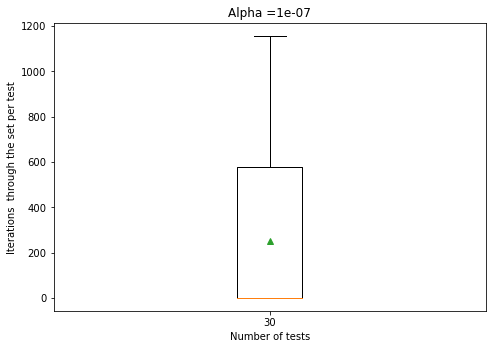


Iterations:  [578, 2, 1, 1, 578, 817, 2, 1156, 1, 1001, 1, 1, 1, 1, 1, 1, 1, 1, 817, 578, 1, 1, 1, 1, 578, 2, 1, 817, 1, 578] 
Average iterations : 250.7 
Standard deviation : 370.843106987308 

_______________________________




In [330]:
random.seed(1)
alphas = [10E-4,10E-5,10E-6,10E-8]
exercise1(alphas)

- À medida que se aumenta o alpha, o número de iterações para atingir um erro de 0 aumenta e consequentemente o desvio padrão também.

# Ex 2

Average accuracy for k = 3 : 95.55555555555556 %
Average accuracy for k = 7 : 97.33333333333333 %
Average accuracy for k = 11 : 98.22222222222221 %


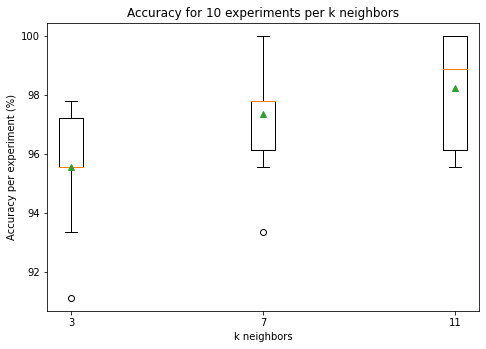

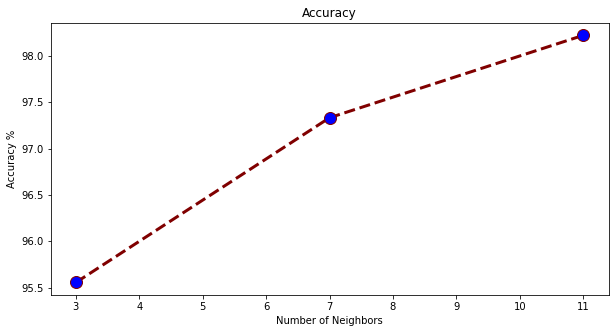

In [375]:
k_neighbors = [3,7,11]
exercise2(data,k_neighbors)


- O 'k' deve ser um número ímpar para prevenir que aconteça empates durante a previsão da class com os k - vizinhos mais próximos.
- Se diminuirmoso valor de k pode ocorrer overfitting e o sistema de classicação fica mais sensível, enquanto que se aumentarmos o valor de k pode levar a underfitting e fica computacionalmente mais complexo

# Ex 3

In [319]:
target_value = "Iris-setosa"
exercise3(data,target_value)

Gain of the split of S by  ' sepal length ' : 0.40926436582784154
Gain of the split of S by  ' sepal width ' : 0.2394884322265003
Gain of the split of S by  ' petal length ' : 0.7140929216261507
Gain of the split of S by  ' petal width ' : 0.6582868653951479


- O 'gain' calcula a redução da entropia ao dividir o dataset em 2.
- Para a construção de uma 'decision tree' iria-se fazer a divisão primeiro com base na divisão que apresentasse um maior ganho, neste caso seria com base na petal length, depois iria se proceder novamente á avaliação do gain com base nos 2 datasets gerados do petal length.

# Ex 4

In [391]:
scores = []
for i in range(10):
    gaussians_setosa = []
    gaussians_versicolor=[]
    gaussians_virginica=[]

    dataset = data.values
    shufle_dataset = copy.deepcopy(dataset)
    intersection_point = int(0.7*150) # ponto de interceção entre os 70% e 30% do dataset

    np.random.shuffle(shufle_dataset)

    training_set = shufle_dataset[:intersection_point] 
    test_set = shufle_dataset[intersection_point:]
    test_set_verify = copy.deepcopy(test_set)

    for i in range(4):

        x_values = get_values()

        mean_setosa, std_setosa        = calculate_mean_std(training_set,i, 'Iris-setosa')
        mean_versicolor,std_versicolor = calculate_mean_std(training_set,i, 'Iris-versicolor')
        mean_virginica, std_virginica  = calculate_mean_std(training_set,i, 'Iris-virginica')

        gaussian_iris_setosa = (np.pi*std_setosa) * np.exp(-0.5*((x_values-mean_setosa)/std_setosa)**2)
        gaussian_iris_versicolor = (np.pi*std_versicolor) * np.exp(-0.5*((x_values-mean_versicolor)/std_versicolor)**2)
        gaussian_iris_virginica = (np.pi*std_virginica) * np.exp(-0.5*((x_values-mean_virginica)/std_virginica)**2)

        gaussians_setosa.append(list(zip(x_values.values,gaussian_iris_setosa.values)))
        gaussians_versicolor.append(list(zip(x_values.values,gaussian_iris_versicolor.values)))
        gaussians_virginica.append(list(zip(x_values.values,gaussian_iris_virginica.values)))

    count_setosa = 0
    count_versicolor = 0
    count_virginica = 0

    for row in training_set:
        if row[-1] == 'Iris-setosa':
            count_setosa+=1
        elif row[-1] == 'Iris-versicolor':
            count_versicolor+=1
        elif row[-1] == 'Iris-virginica':
            count_virginica+=1

    p_setosa = count_setosa/len(training_set)
    p_versicolor = count_versicolor/len(training_set)
    p_virginica = count_virginica/len(training_set)

    for r in test_set:

        probabilities = calculate__probabilities()
        if max(probabilities) == probabilities[0]:
            r[-1] = 'Iris-setosa'
        elif max(probabilities) == probabilities[1]:
            r[-1] = 'Iris-versicolor'

        elif max(probabilities) == probabilities[2]:
            r[-1] = 'Iris-virginica'

    count = 0
    for predicted_row,verified_row in zip(test_set,test_set_verify):
        if predicted_row[-1] == verified_row[-1]:
            count +=1

    score = count/len(test_set)*100
    scores.append(score)
    
print("All accuracies:",scores)
print("\nAverage accuracy per test:",np.mean(scores),"%")


    

All accuracies: [91.11111111111111, 95.55555555555556, 97.77777777777777, 93.33333333333333, 93.33333333333333, 93.33333333333333, 100.0, 100.0, 97.77777777777777, 95.55555555555556]

Average accuracy per test: 95.77777777777777 %
